In [ ]:
###    a  result       ###
The analytic solution is: β = (X.T * X+0.0001 * Ip ).I * X.T * Y 
avg_train_r is : 0.5300669715193409
avg_test_r is: 0.5081597024001316
    
##     b  result       ## 
the test average r^2 score under different depth:
[1, 2, 3, 4, 5, 6, 7]
['0.266635', '0.366659', '0.411241', '0.433401', '0.456710', '0.469826', '0.442630']
the train average r^2 score under different depth:
['0.284804', '0.375542', '0.426791', '0.497753', '0.548679', '0.595937', '0.650281']
# picture can't show here.please see the line [106]

##      c result       ## 
the test average r^2 score under different Randomtree number:
[10, 30, 100]
['0.509490', '0.516871', '0.518695']
the train average r^2 score under different Randomtree number:
['0.911127', '0.929245', '0.935385']

In [60]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [61]:
######  a  ######
# import and data preprocessing
data = pd.read_csv("D:/2020fall/5635 machine learning\
/5635 hw/hw2/abalone.csv",header= None)
X = data.drop(columns = 7)
X = np.array(X)
y = data[7]
y = np.array(y)
X=np.hstack((np.ones((np.shape(X)[0],1),dtype=int),X))
# insert a all 1 column into X
lam = 0.0001

In [62]:
# define a ridgefunction to get beda coef_
def ridgeRegres(xMat,yMat,lam):
    xTx = xMat.T*xMat
    denom = xTx + np.eye(np.shape(xMat)[1])*lam
    if np.linalg.det(denom) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    w = denom.I * (xMat.T*yMat)
    return w

In [63]:
# define a R^2 score test
def R_square(X_train,X_test,y_train,y_test):
    beta = ridgeRegres(X_train,y_train, lam)
  # y_train_1 = X_train*beta
    y_train_ = np.dot(X_train,beta)
    y_test_ = np.dot(X_test,beta)
    row_train = y_train.shape[0]
    row_test = y_test.shape[0]
    R_train = 1 - np.sum((y_train_ -y_train).T*(y_train_ -y_train))\
        / (row_train*y_train.var())    
    R_test = 1 - np.sum((y_test_ - y_test).T*(y_test_ -y_test))\
        / (row_test*y_test.var())
    return R_train,R_test

In [64]:
# calculate and print result
train_r = []
test_r = []
for i in range(10):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2)
    X_train = np.mat(X_train); y_train=np.mat(y_train).T
    X_test = np.mat(X_test); y_test = np.mat(y_test).T
    R= R_square(X_train,X_test,y_train,y_test)
    train_r.append(R[0])
    test_r.append(R[1])
print('###      result       ###')
print('The analytic solution is: β = (X.T * X+0.0001 * Ip ).I * X.T * Y ')
print('avg_train_r is :',sum(train_r)/10)
print('avg_test_r is:',sum(test_r)/10)
    

###      result       ###
The analytic solution is: β = (X.T * X+0.0001 * Ip ).I * X.T * Y 
avg_train_r is : 0.5300669715193409
avg_test_r is: 0.5081597024001316


In [90]:
########## problem b ###########
##### decisiontreeRegression model ######
from sklearn.tree import DecisionTreeRegressor

In [103]:
# import and data preprocessing
abalone = pd.read_csv("D:/2020fall/5635 machine learning\
/5635 hw/hw2/abalone.csv",header= None)
X = abalone.drop(columns = 7)
data = np.array(X)
y = abalone[7]
target = np.array(y)

In [105]:
avg_test_r2=[]
avg_train_r2=[]
x=[]
for i in range(1,8,1):
    count = 0
    test_r2_ = 0
    train_r2_ = 0
    for j in range(1,11,1):
        X_train,y_test,X_valid,y_valid = train_test_split(data,target,test_size =0.2)
        lr = DecisionTreeRegressor(criterion='mse',max_depth=i)
        lr.fit(X_train,X_valid)
        y_valid_ = lr.predict(y_test)
        X_valid_ = lr.predict(X_train)
        test_r2_ += r2_score(y_valid,y_valid_)
        train_r2_ += r2_score(X_valid,X_valid_)
        count +=1
    x.append(i)
    avg_test_r2.append(format(test_r2_ / count,'.6f'))
    avg_train_r2.append(format(train_r2_ / count,'.6f'))

##       result       ## 
the test average r^2 score under different depth:
[1, 2, 3, 4, 5, 6, 7]
['0.266635', '0.366659', '0.411241', '0.433401', '0.456710', '0.469826', '0.442630']
the train average r^2 score under different depth:
['0.284804', '0.375542', '0.426791', '0.497753', '0.548679', '0.595937', '0.650281']


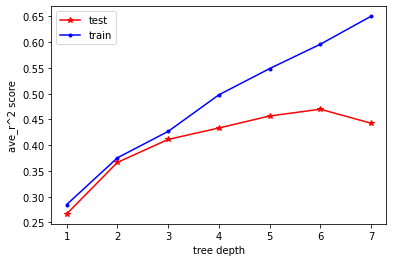

In [106]:
######  result    #######    
print('##       result       ## ')
print('the test average r^2 score under different depth:')
print(x)
print(avg_test_r2)
print('the train average r^2 score under different depth:')
print(avg_train_r2)
avg_train_r2 = list(map(float,avg_train_r2))
avg_test_r2 = list(map(float,avg_test_r2))
plt.figure()
plt.plot(x,avg_test_r2,'r*-',label = 'test')
plt.plot(x,avg_train_r2,'b.-',label = 'train')
plt.xlabel('tree depth')
plt.ylabel('ave_r^2 score')
plt.legend()

In [107]:
########## problem c ###########
##### randomforestRegression model ######
from sklearn.ensemble import RandomForestRegressor

In [108]:
avg_test_r2=[]
avg_train_r2=[]
x=[]
for i in [10,30,100]:
    count = 0
    test_r2_ = 0
    train_r2_ = 0
    for j in range(1,11,1):
        X_train,y_test,X_valid,y_valid = train_test_split(data,target,test_size =0.2)
        lr = RandomForestRegressor(n_estimators=i,random_state=1)
        lr.fit(X_train,X_valid)
        y_valid_ = lr.predict(y_test)
        X_valid_ = lr.predict(X_train)
        test_r2_ += r2_score(y_valid,y_valid_)
        train_r2_ += r2_score(X_valid,X_valid_)
        count +=1
    x.append(i)
    avg_test_r2.append(format(test_r2_ / count,'.6f'))
    avg_train_r2.append(format(train_r2_ / count,'.6f'))

In [109]:
######  result    #######    
print('##       result       ## ')
print('the test average r^2 score under different Randomtree number:')
print(x)
print(avg_test_r2)
print('the train average r^2 score under different Randomtree number:')
print(avg_train_r2)
avg_train_r2 = list(map(float,avg_train_r2))
avg_test_r2 = list(map(float,avg_test_r2))

##       result       ## 
the test average r^2 score under different Randomtree number:
[10, 30, 100]
['0.509490', '0.516871', '0.518695']
the train average r^2 score under different Randomtree number:
['0.911127', '0.929245', '0.935385']
